In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('S02-hw-dataset.csv')

print("Первые 5 строк датасета:")
display(df.head())

print("\nИнформация о датасете:")
df.info()

print("\nОписательные статистики:")
display(df.describe())

Первые 5 строк датасета:


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [2]:
print("Доля пропусков в каждом столбце:")
missing_data = df.isna().mean()
print(missing_data)

duplicates = df.duplicated().sum()
print(f"\nКоличество дублирующих строк: {duplicates}")

if duplicates > 0:
    print("\nДублирующие строки:")
    display(df[df.duplicated(keep=False)])

print("\nПодозрительные случаи:")

negative_purchases = df[df['purchases'] < 0]
if not negative_purchases.empty:
    print("\nОтрицательные значения покупок:")
    display(negative_purchases)

unrealistic_age = df[(df['age'] > 100) | (df['age'] < 0)]
if not unrealistic_age.empty:
    print("\nНереалистичные значения возраста:")
    display(unrealistic_age)

zero_revenue_with_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
if not zero_revenue_with_purchases.empty:
    print("\nНулевой доход при ненулевых покупках:")
    display(zero_revenue_with_purchases)

Доля пропусков в каждом столбце:
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

Количество дублирующих строк: 1

Дублирующие строки:


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511



Подозрительные случаи:

Отрицательные значения покупок:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Нереалистичные значения возраста:


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



Нулевой доход при ненулевых покупках:


,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


### Описание проблем качества данных

На основе проведенного анализа были выявлены следующие проблемы качества данных:

1. **Пропущенные значения**: В столбце 'age' имеются пропущенные значения (2 строки).
2. **Дублирующиеся записи**: В датасете присутствует одна полностью дублирующая строка.
3. **Нереалистичные значения**: 
   - У одного пользователя указан возраст 120 лет, что является нереалистичным.
   - У одного пользователя отрицательное количество покупок -1, что невозможно.
4. **Логические противоречия**: 
   - Есть записи с нулевым доходом при ненулевых покупках.
   - Есть записи с нулевыми покупками и нулевым доходом, что может быть нормальным, но требует проверки.

In [3]:
print("Частоты стран:")
country_freq = df['country'].value_counts()
print(country_freq)

print("\nСредние значения по странам:")
country_agg = df.groupby('country').agg({
    'age': 'mean',
    'purchases': 'mean',
    'revenue': ['mean', 'sum']
}).round(2)
display(country_agg)

df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 18, 35, 50, 100], 
                         labels=['Молодежь (0-18)', 'Молодые взрослые (19-35)', 'Взрослые (36-50)', 'Пожилые (>50)'])

print("\nСредние значения по возрастным группам:")
age_group_agg = df.groupby('age_group').agg({
    'purchases': 'mean',
    'revenue': 'mean'
}).round(2)
display(age_group_agg)

Частоты стран:
country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

Средние значения по странам:


age purchases  revenue       
          mean      mean     mean    sum
country                                 
CN       24.00      4.50  1054.00   2108
DE       34.60      6.50  1445.50   8673
FR       46.25      4.25   675.92   8111
RU       30.08      4.77   790.08  10271
US       36.71      4.62   557.38   4459


Средние значения по возрастным группам:


/var/folders/n_/mqpqp2w54_n0gnng_thc3sv40000gq/T/ipykernel_95614/2637993971.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_agg = df.groupby('age_group').agg({


,purchases,revenue
age_group,,
Молодежь (0-18),6.00,1296.00
Молодые взрослые (19-35),4.95,772.90
Взрослые (36-50),4.22,945.33
Пожилые (>50),5.00,596.67


### Основные наблюдения

1. **Доминирующие категории**: 
   - По количеству пользователей доминируют Россия (RU) и Франция (FR).

2. **Различия между группами**:
   - Средний доход и количество покупок значительно различаются по странам.
   - Германия имеет самый высокий средний доход на человека.
   - По возрастным группам видно, что молодые взрослые (19-35) имеют немного больше покупок в среднем, чем другие группы.

3. **Неожиданные эффекты**:
   - Молодежь (<=18 лет) имеет более высокий средний доход, чем другие возрастные группы.

In [4]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

Гистограмма показывает распределение дохода пользователей. 
Можно заметить, что большинство пользователей имеют доход в диапазоне 0-1000.

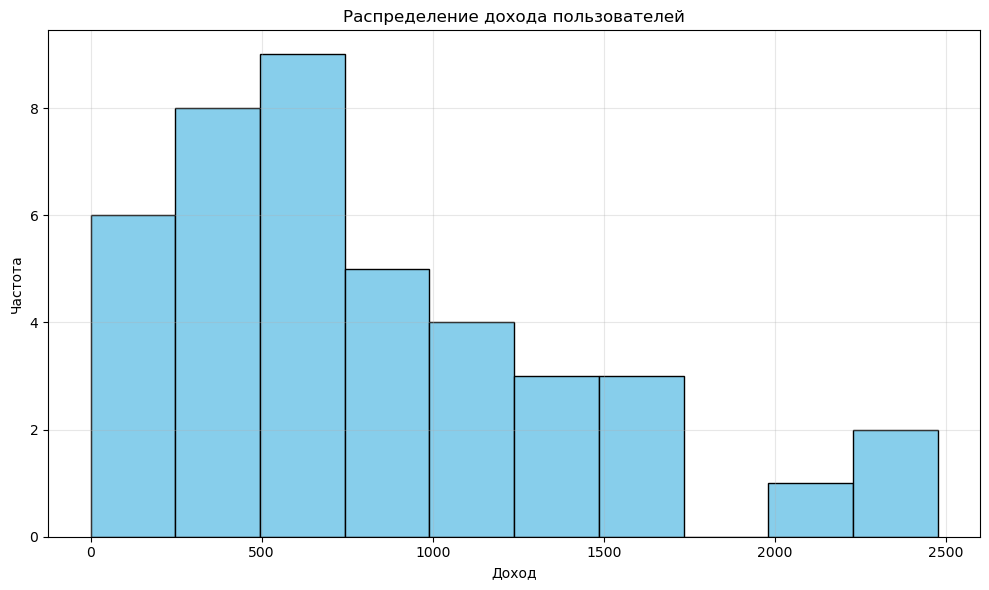

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение дохода пользователей')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Боксплот показывает распределение дохода по странам. Видно, что Германия имеет самый высокий медианный доход. У России наибольший разброс значений.

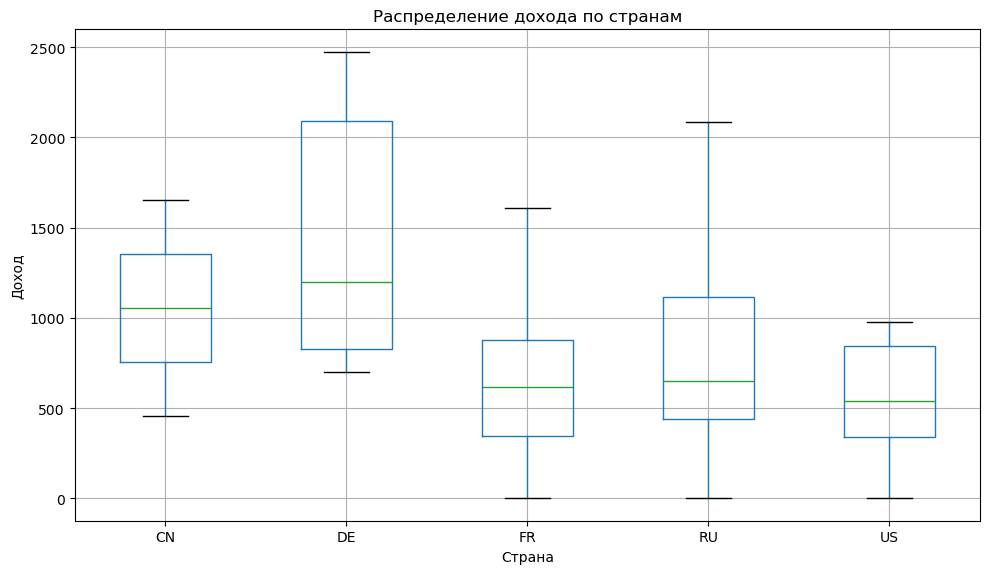

In [8]:
plt.figure(figsize=(10, 6))
df.boxplot(column='revenue', by='country', ax=plt.gca())
plt.title('Распределение дохода по странам')
plt.xlabel('Страна')
plt.ylabel('Доход')
plt.suptitle('')
plt.tight_layout()
plt.show()

Диаграмма рассеяния показывает зависимость количества покупок от дохода. Наблюдается положительная корреляция - чем выше доход, тем больше покупок. Однако есть исключения, например, пользователи с большим количеством покупок, но низким доходом (возможно, покупки по акциям или скидкам).

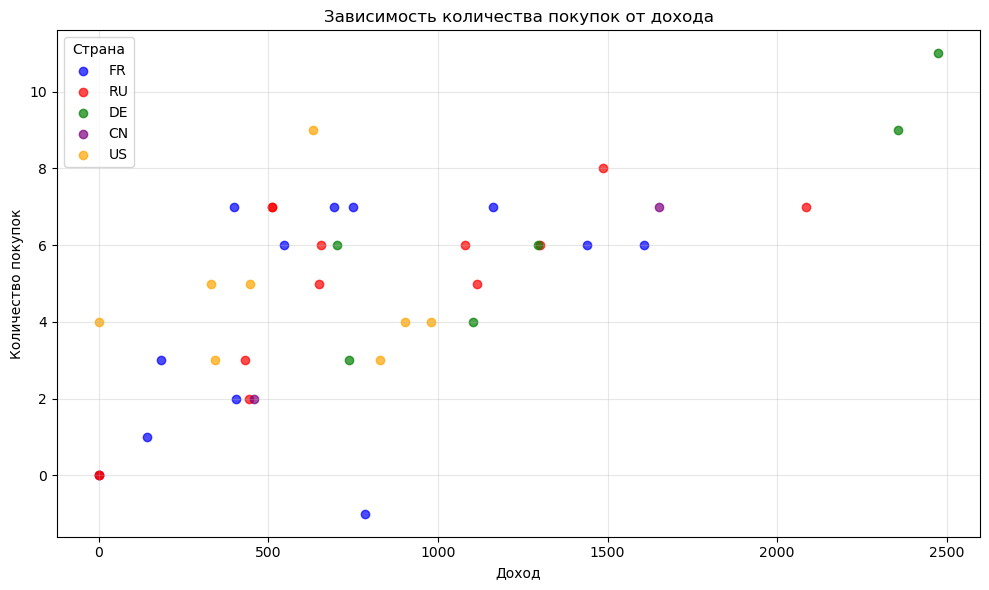

In [13]:
plt.figure(figsize=(10, 6))
colors = {'RU': 'red', 'FR': 'blue', 'DE': 'green', 'US': 'orange', 'CN': 'purple'}
for country in df['country'].unique():
    country_data = df[df['country'] == country]
    plt.scatter(country_data['revenue'], country_data['purchases'], 
               label=country, color=colors.get(country, 'gray'), alpha=0.7)

plt.title('Зависимость количества покупок от дохода')
plt.xlabel('Доход')
plt.ylabel('Количество покупок')
plt.legend(title='Страна')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

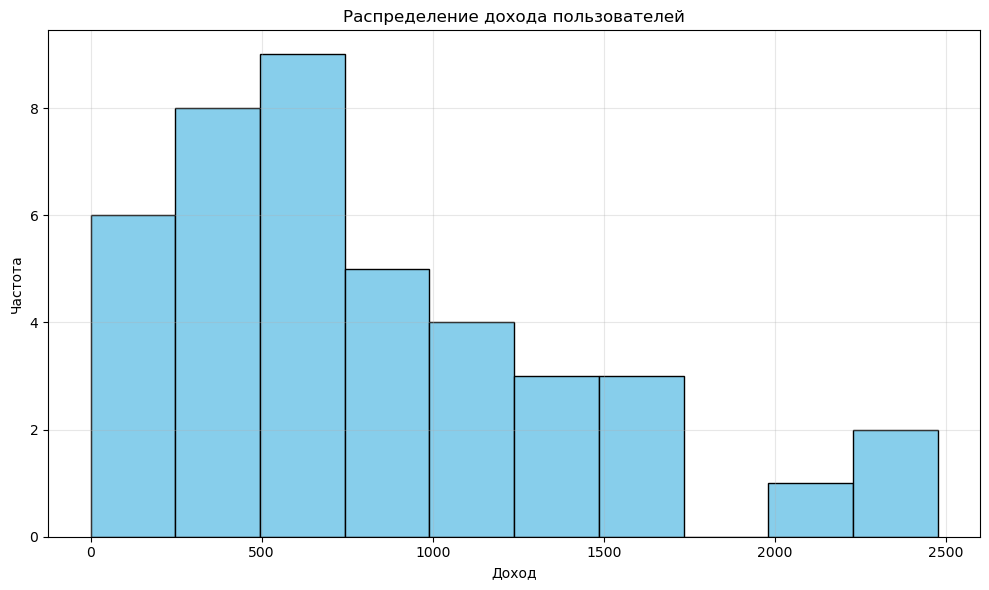

График сохранен в файл: figures/revenue_distribution.png


In [11]:
plt.figure(figsize=(10, 6))
plt.hist(df['revenue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Распределение дохода пользователей')
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('figures/revenue_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("График сохранен в файл: figures/revenue_distribution.png")